## Nominal Decision Tree with Feature Engineering

In [3]:
from sklearn.model_selection import train_test_split
import xarray as xr
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from skimage.measure import block_reduce
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from scipy.stats import sem
from scipy.stats import t

data_temp = xr.open_mfdataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\12km_Month_Temp\*.nc", parallel=True)
data_tmax = xr.open_mfdataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\12km_Month_tmax\*.nc", parallel=True)
data_tmin = xr.open_mfdataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\12km_Month_tmin\*.nc", parallel=True)
data_rain = xr.open_mfdataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\12km_Month_Rain\*.nc", parallel=True)
data_hurs = xr.open_mfdataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\12km_Month_Humidity\*.nc", parallel=True)
data_sun = xr.open_mfdataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\12km_Month_Sun\*.nc", parallel=True)
data_frost = xr.open_mfdataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\12km_Month_Frost\*.nc", parallel=True)
data_psl = xr.open_mfdataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\12km_Month_psl\*.nc", parallel=True)
data_wind = xr.open_mfdataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\12km_Month_Wind\*.nc", parallel=True)

In [4]:
rain = np.array(data_rain['rainfall'])
hurs = np.array(data_hurs['hurs'])
temp = np.array(data_temp['tas'])
temp_max = np.array(data_tmax['tasmax'])
temp_min = np.array(data_tmin['tasmin'])
sun = np.array(data_sun['sun'])
frost = np.array(data_frost['groundfrost'])
psl = np.array(data_psl['psl'])
wind = np.array(data_wind['sfcWind'])

temp_reduced = block_reduce(temp, block_size=(12, 1, 1), func=np.mean, cval=np.mean(temp))
tmax_reduced = block_reduce(temp_max, block_size=(12, 1, 1), func=np.mean, cval=np.mean(temp_max))
tmin_reduced = block_reduce(temp_min, block_size=(12, 1, 1), func=np.mean, cval=np.mean(temp_min))
rain_reduced = block_reduce(rain, block_size=(12, 1, 1), func=np.mean, cval=np.mean(rain))
hurs_reduced = block_reduce(hurs, block_size=(12, 1, 1), func=np.mean, cval=np.mean(hurs))
sun_reduced = block_reduce(sun, block_size=(12, 1, 1), func=np.mean, cval=np.mean(sun))
frost_reduced = block_reduce(frost, block_size=(12, 1, 1), func=np.mean, cval=np.mean(frost))
psl_reduced = block_reduce(psl, block_size=(12, 1, 1), func=np.mean, cval=np.mean(psl))
wind_reduced = block_reduce(wind, block_size=(12, 1, 1), func=np.mean, cval=np.mean(wind))

min_length = len(wind_reduced)
rain_reduced = rain_reduced[:min_length]
hurs_reduced = hurs_reduced[:min_length]
temp_reduced = temp_reduced[:min_length]
tmax_reduced = tmax_reduced[:min_length]
tmin_reduced = tmin_reduced[:min_length]
sun_reduced = sun_reduced[:min_length]
frost_reduced = frost_reduced[:min_length]
wind_reduced = wind_reduced[:min_length]
psl_reduced = psl_reduced[:min_length]

In [5]:
months_per_year = 12
num_years = temp_max.shape[0] // months_per_year

temp_max_reshaped = temp_max[:num_years * months_per_year].reshape(num_years, months_per_year, temp_max.shape[1], temp_max.shape[2])

temp_max_reshaped = np.max(temp_max_reshaped, axis=1)

tmax_max_annual_mean = temp_max_reshaped[:min_length]

In [6]:
num_years = temp_min.shape[0] // months_per_year

temp_min_reshaped = temp_min[:num_years * months_per_year].reshape(num_years, months_per_year, temp_min.shape[1], temp_min.shape[2])
temp_min_reshaped = np.min(temp_min_reshaped, axis=1)

tmin_min_annual_mean = temp_min_reshaped[:min_length]

In [7]:
months_per_year = 12
num_years = rain.shape[0] // months_per_year

rain_max_reshaped = rain[:num_years * months_per_year].reshape(num_years, months_per_year, rain.shape[1], rain.shape[2])

rain_max_reshaped = np.max(rain_max_reshaped, axis=1)

rain_max_annual_mean = rain_max_reshaped[:min_length]

rain_min_reshaped = rain[:num_years * months_per_year].reshape(num_years, months_per_year, rain.shape[1], rain.shape[2])

rain_min_reshaped = np.min(rain_min_reshaped, axis=1)

rain_min_annual_mean = rain_min_reshaped[:min_length]

In [8]:
months_per_year = 12
num_years = hurs.shape[0] // months_per_year

hurs_max_reshaped = hurs[:num_years * months_per_year].reshape(num_years, months_per_year, hurs.shape[1], hurs.shape[2])

hurs_max_reshaped = np.min(hurs_max_reshaped, axis=1)

hurs_max_annual_mean = hurs_max_reshaped[:min_length]

hurs_min_reshaped = hurs[:num_years * months_per_year].reshape(num_years, months_per_year, hurs.shape[1], hurs.shape[2])

hurs_min_reshaped = np.min(hurs_min_reshaped, axis=1)

hurs_min_annual_mean = hurs_min_reshaped[:min_length]

In [9]:
months_per_year = 12
num_years = sun.shape[0] // months_per_year

sun_max_reshaped = sun[:num_years * months_per_year].reshape(num_years, months_per_year, sun.shape[1], sun.shape[2])

sun_max_reshaped = np.max(sun_max_reshaped, axis=1)

sun_max_annual_mean = sun_max_reshaped[:min_length]

sun_min_reshaped = sun[:num_years * months_per_year].reshape(num_years, months_per_year, sun.shape[1], sun.shape[2])

sun_min_reshaped = np.min(sun_min_reshaped, axis=1)

sun_min_annual_mean = sun_min_reshaped[:min_length]

In [10]:
months_per_year = 12
num_years = frost.shape[0] // months_per_year

frost_max_reshaped = frost[:num_years * months_per_year].reshape(num_years, months_per_year, frost.shape[1], frost.shape[2])

frost_max_reshaped = np.max(frost_max_reshaped, axis=1)

frost_max_annual_mean = frost_max_reshaped[:min_length]

frost_min_reshaped = frost[:num_years * months_per_year].reshape(num_years, months_per_year, frost.shape[1], frost.shape[2])

frost_min_reshaped = np.min(frost_min_reshaped, axis=1)

frost_min_annual_mean = frost_min_reshaped[:min_length]

In [11]:
months_per_year = 12
num_years = psl.shape[0] // months_per_year

psl_max_reshaped = psl[:num_years * months_per_year].reshape(num_years, months_per_year, psl.shape[1], psl.shape[2])

psl_max_reshaped = np.max(psl_max_reshaped, axis=1)

psl_max_annual_mean = psl_max_reshaped[:min_length]

psl_min_reshaped = psl[:num_years * months_per_year].reshape(num_years, months_per_year, psl.shape[1], psl.shape[2])
psl_min_reshaped = np.min(psl_min_reshaped, axis=1)

psl_min_annual_mean = psl_min_reshaped[:min_length]

In [12]:
months_per_year = 12
num_years = wind.shape[0] // months_per_year

wind_max_reshaped = wind[:num_years * months_per_year].reshape(num_years, months_per_year, wind.shape[1], wind.shape[2])

wind_max_reshaped = np.max(wind_max_reshaped, axis=1)

wind_max_annual_mean = wind_max_reshaped[:min_length]

wind_min_reshaped = wind[:num_years * months_per_year].reshape(num_years, months_per_year, wind.shape[1], wind.shape[2])
wind_min_reshaped = np.min(wind_min_reshaped, axis=1)

wind_min_annual_mean = wind_min_reshaped[:min_length]

In [13]:
scaler = MinMaxScaler()

rain = scaler.fit_transform(rain_reduced.reshape(-1, 1)).flatten()
hurs = scaler.fit_transform(hurs_reduced.reshape(-1, 1)).flatten()
temp_annual_mean = scaler.fit_transform(temp_reduced.reshape(-1, 1)).flatten()
tmax_annual_mean = scaler.fit_transform(tmax_reduced.reshape(-1, 1)).flatten()
tmin_annual_mean = scaler.fit_transform(tmin_reduced.reshape(-1, 1)).flatten()
sun = scaler.fit_transform(sun_reduced.reshape(-1, 1)).flatten()
frost = scaler.fit_transform(frost_reduced.reshape(-1, 1)).flatten()
psl = scaler.fit_transform(psl_reduced.reshape(-1, 1)).flatten()
wind = scaler.fit_transform(wind_reduced.reshape(-1, 1)).flatten()
rain_max = scaler.fit_transform(rain_max_annual_mean.reshape(-1, 1)).flatten()
rain_min = scaler.fit_transform(rain_min_annual_mean.reshape(-1, 1)).flatten()
hurs_max = scaler.fit_transform(hurs_max_annual_mean.reshape(-1, 1)).flatten()
hurs_min = scaler.fit_transform(hurs_min_annual_mean.reshape(-1, 1)).flatten()
tmax_max = scaler.fit_transform(tmax_max_annual_mean.reshape(-1, 1)).flatten()
tmin_min = scaler.fit_transform(tmin_min_annual_mean.reshape(-1, 1)).flatten()
sun_max = scaler.fit_transform(sun_max_annual_mean.reshape(-1, 1)).flatten()
sun_min = scaler.fit_transform(sun_min_annual_mean.reshape(-1, 1)).flatten()
frost_max = scaler.fit_transform(frost_max_annual_mean.reshape(-1, 1)).flatten()
frost_min = scaler.fit_transform(frost_min_annual_mean.reshape(-1, 1)).flatten()
psl_max = scaler.fit_transform(psl_max_annual_mean.reshape(-1, 1)).flatten()
psl_min = scaler.fit_transform(psl_min_annual_mean.reshape(-1, 1)).flatten()
wind_max = scaler.fit_transform(wind_max_annual_mean.reshape(-1, 1)).flatten()
wind_min = scaler.fit_transform(wind_min_annual_mean.reshape(-1, 1)).flatten()

In [14]:
# Assuming temp, temp_max, and temp_min have shape (num_years, x, y)
num_years_temp, x, y = temp.shape

# Create an array of years to match the reshaped temperature arrays
years_expanded = np.repeat(np.arange(1969, 2023), x * y)

data_dict = {
    'Year': years_expanded,
    'Temperature': temp_annual_mean,
    'Maximum Temperature': tmax_annual_mean,
    'Maximum Max Temperature': tmax_max,
    'Minimum Temperature': tmin_annual_mean,
    'Minimum Min Temperature': tmin_min,
    'Rainfall': rain,
    'Maximum Rainfall': rain_max,
    'Minimum Rainfall': rain_min,
    'Humidity': hurs,
    'Maximum Humidity': hurs_max,
    'Minimum Humidity': hurs_min,
    'Ground Frost': frost,
    'Maximum Ground Frost': frost_max,
    'Minimum Ground Frost': frost_min,
    'Sunshine': sun,
    'Maximum Sunshine': sun_max,
    'Minimum Sunshine': sun_min,
    'Mean Sea Level Pressure': psl,
    'Maximum Mean Sea Level Pressure': psl_max,
    'Minimum Mean Sea Level Pressure': psl_min,
    'Wind Speed': wind,
    'Maximum Wind Speed': wind_max,
    'Minimum Wind Speed': wind_min
}

df = pd.DataFrame(data_dict)
df.set_index('Year', inplace=True)
df = df.sort_values(by='Year')
df.dropna(inplace=True)
df['Class'] = df.index.map(lambda year: 'pre_1990' if year < 1990 else 'post_1990')


print(df)

      Temperature  Maximum Temperature  Maximum Max Temperature  \
Year                                                              
1969     0.503427             0.530206                 0.508296   
1969     0.468754             0.488834                 0.476249   
1969     0.403725             0.418404                 0.420811   
1969     0.504660             0.416010                 0.383035   
1969     0.444492             0.364899                 0.355628   
...           ...                  ...                      ...   
2022     0.565655             0.539912                 0.532393   
2022     0.687914             0.674667                 0.646078   
2022     0.731090             0.726687                 0.691854   
2022     0.702006             0.685939                 0.667676   
2022     0.518845             0.463227                 0.441207   

      Minimum Temperature  Minimum Min Temperature  Rainfall  \
Year                                                           


In [15]:
from sklearn.tree import DecisionTreeClassifier

X = df[['Temperature', 'Maximum Temperature', 'Maximum Max Temperature', 'Minimum Temperature', 'Minimum Min Temperature', 'Rainfall', 'Maximum Rainfall', 'Minimum Rainfall', 'Humidity', 'Maximum Humidity', 'Minimum Humidity',  'Ground Frost', 'Maximum Ground Frost', 'Minimum Ground Frost', 'Sunshine', 'Maximum Sunshine', 'Minimum Sunshine',  'Mean Sea Level Pressure', 'Maximum Mean Sea Level Pressure', 'Minimum Mean Sea Level Pressure', 'Wind Speed', 'Maximum Wind Speed', 'Minimum Wind Speed']].values
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
tree = DecisionTreeClassifier(max_depth=5, random_state=0)
tree.fit(X_train, y_train)
print('Accuracy on training set: {:3f}'.format(tree.score(X_train, y_train)))
print('Accuracy on test set: {:3f}'.format(tree.score(X_test, y_test)))
scores = cross_val_score(tree, X, y, cv=5)  # 5-fold cross-validation
print("Average Accuracy: {:.4f}".format(scores.mean()))
mean_score = scores.mean()
confidence = 0.95
confidence_interval = t.interval(confidence, len(scores) - 1, loc=mean_score, scale=sem(scores))
print(f"{int(confidence * 100)}% Confidence Interval:", confidence_interval)

Accuracy on training set: 0.748386
Accuracy on test set: 0.750557
Average Accuracy: 0.5946
95% Confidence Interval: (0.51351605552519, 0.6756951285809861)


Temperature: 0.0000
Maximum Temperature: 0.0003
Maximum Max Temperature: 0.0310
Minimum Temperature: 0.0002
Minimum Min Temperature: 0.1234
Rainfall: 0.0215
Maximum Rainfall: 0.0000
Minimum Rainfall: 0.0855
Humidity: 0.4296
Maximum Humidity: 0.0222
Minimum Humidity: 0.0000
Ground Frost: 0.0354
Maximum Ground Frost: 0.0116
Minimum Ground Frost: 0.0000
Sunshine: 0.0000
Maximum Sunshine: 0.0391
Minimum Sunshine: 0.0010
Mean Sea Level Pressure: 0.0514
Maximum Mean Sea Level Pressure: 0.0327
Minimum Mean Sea Level Pressure: 0.1154
Wind Speed: 0.0000
Maximum Wind Speed: 0.0000
Minimum Wind Speed: 0.0000


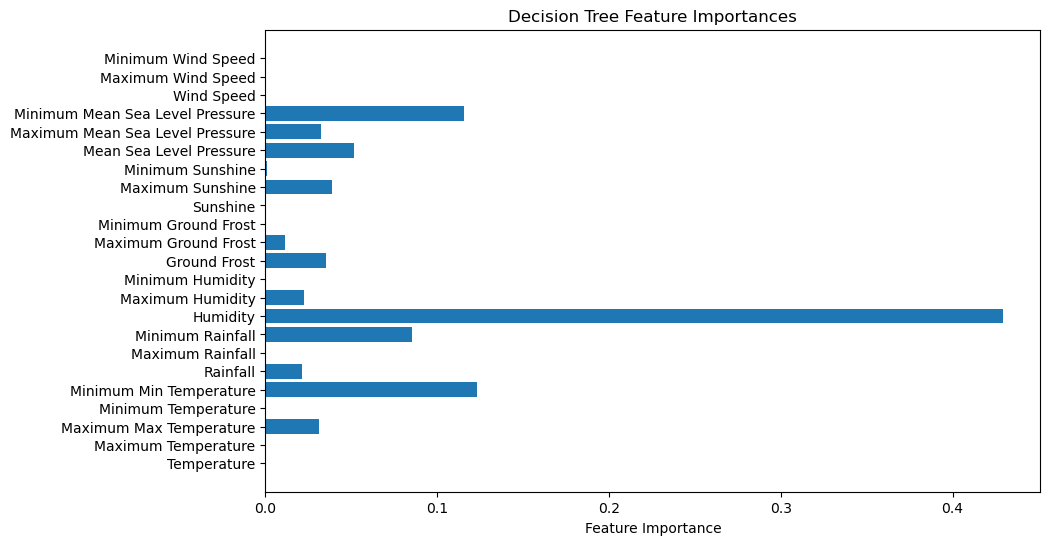

In [16]:
importances = tree.feature_importances_
feature_names = df[['Temperature', 'Maximum Temperature', 'Maximum Max Temperature', 'Minimum Temperature', 'Minimum Min Temperature', 'Rainfall', 'Maximum Rainfall', 'Minimum Rainfall', 'Humidity', 'Maximum Humidity', 'Minimum Humidity',  'Ground Frost', 'Maximum Ground Frost', 'Minimum Ground Frost', 'Sunshine', 'Maximum Sunshine', 'Minimum Sunshine',  'Mean Sea Level Pressure', 'Maximum Mean Sea Level Pressure', 'Minimum Mean Sea Level Pressure', 'Wind Speed', 'Maximum Wind Speed', 'Minimum Wind Speed']].columns

for feature, importance in zip(feature_names, importances):
    print('{}: {:.4f}'.format(feature, importance))
    
plt.figure(figsize=(10, 6))
plt.barh(range(len(importances)), importances, align='center')
plt.yticks(np.arange(len(importances)), feature_names)
plt.xlabel('Feature Importance')
plt.title('Decision Tree Feature Importances')
plt.show()

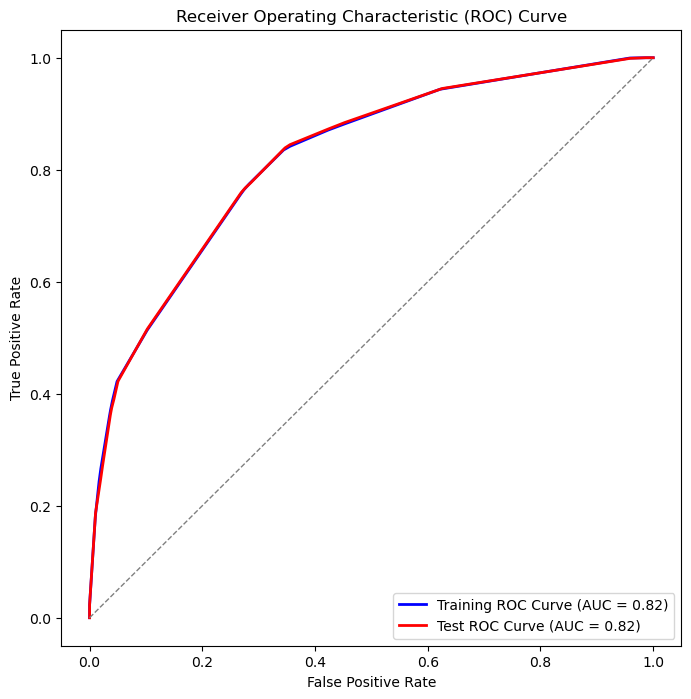

In [17]:
le = LabelEncoder()
y_train_binary = le.fit_transform(y_train)
y_test_binary = le.transform(y_test)

# Get the predicted probabilities for the positive class for both training and test sets
y_train_prob = tree.predict_proba(X_train)[:, 1]
y_test_prob = tree.predict_proba(X_test)[:, 1]

# Compute the ROC curve for both training and test sets
fpr_train, tpr_train, thresholds_train = roc_curve(y_train_binary, y_train_prob)
fpr_test, tpr_test, thresholds_test = roc_curve(y_test_binary, y_test_prob)

# Calculate the area under the curve (AUC) for both training and test sets
auc_train = auc(fpr_train, tpr_train)
auc_test = auc(fpr_test, tpr_test)

# Plot ROC curves
plt.figure(figsize=(8, 8))
plt.plot(fpr_train, tpr_train, color='blue', lw=2, label=f'Training ROC Curve (AUC = {auc_train:.2f})')
plt.plot(fpr_test, tpr_test, color='red', lw=2, label=f'Test ROC Curve (AUC = {auc_test:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

## Deeper Tree

In [18]:
X = df[['Temperature', 'Maximum Temperature', 'Maximum Max Temperature', 'Minimum Temperature', 'Minimum Min Temperature', 'Rainfall', 'Maximum Rainfall', 'Minimum Rainfall', 'Humidity', 'Maximum Humidity', 'Minimum Humidity',  'Ground Frost', 'Maximum Ground Frost', 'Minimum Ground Frost', 'Sunshine', 'Maximum Sunshine', 'Minimum Sunshine',  'Mean Sea Level Pressure', 'Maximum Mean Sea Level Pressure', 'Minimum Mean Sea Level Pressure', 'Wind Speed', 'Maximum Wind Speed', 'Minimum Wind Speed']].values
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
tree = DecisionTreeClassifier(max_depth=25, random_state=0)
tree.fit(X_train, y_train)
print('Accuracy on training set: {:3f}'.format(tree.score(X_train, y_train)))
print('Accuracy on test set: {:3f}'.format(tree.score(X_test, y_test)))
scores = cross_val_score(tree, X, y, cv=5)  # 5-fold cross-validation
print("Average Accuracy: {:.4f}".format(scores.mean()))
mean_score = scores.mean()
confidence = 0.95
confidence_interval = t.interval(confidence, len(scores) - 1, loc=mean_score, scale=sem(scores))
print(f"{int(confidence * 100)}% Confidence Interval:", confidence_interval)

Accuracy on training set: 0.998926
Accuracy on test set: 0.941173
Average Accuracy: 0.5962
95% Confidence Interval: (0.5024784517214975, 0.6898652181793978)


Temperature: 0.0176
Maximum Temperature: 0.0244
Maximum Max Temperature: 0.0391
Minimum Temperature: 0.0143
Minimum Min Temperature: 0.0793
Rainfall: 0.0250
Maximum Rainfall: 0.0137
Minimum Rainfall: 0.0439
Humidity: 0.1569
Maximum Humidity: 0.0218
Minimum Humidity: 0.0256
Ground Frost: 0.0373
Maximum Ground Frost: 0.0432
Minimum Ground Frost: 0.0099
Sunshine: 0.0179
Maximum Sunshine: 0.0514
Minimum Sunshine: 0.0225
Mean Sea Level Pressure: 0.0841
Maximum Mean Sea Level Pressure: 0.1095
Minimum Mean Sea Level Pressure: 0.1325
Wind Speed: 0.0073
Maximum Wind Speed: 0.0157
Minimum Wind Speed: 0.0071


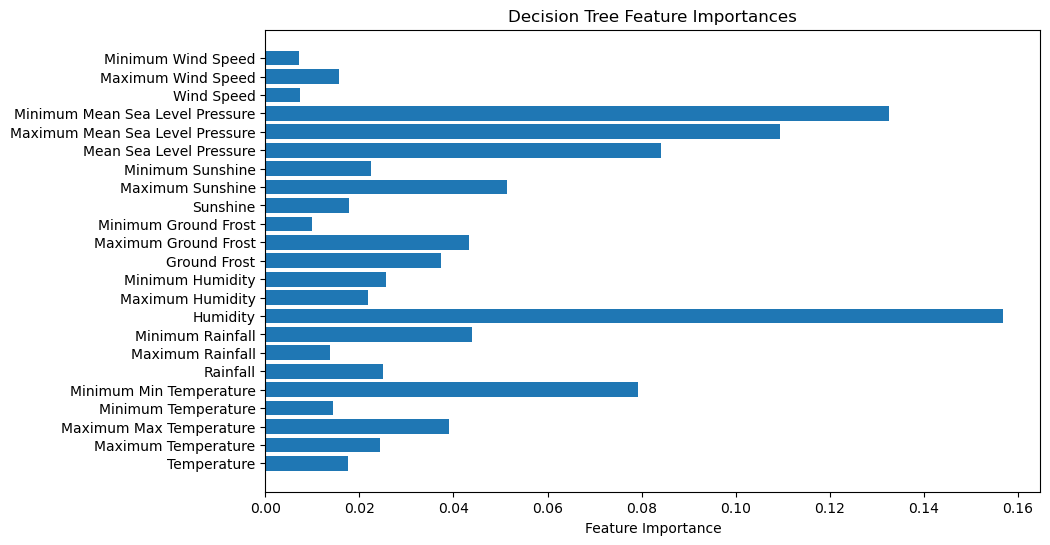

In [19]:
importances = tree.feature_importances_
feature_names = df[['Temperature', 'Maximum Temperature', 'Maximum Max Temperature', 'Minimum Temperature', 'Minimum Min Temperature', 'Rainfall', 'Maximum Rainfall', 'Minimum Rainfall', 'Humidity', 'Maximum Humidity', 'Minimum Humidity',  'Ground Frost', 'Maximum Ground Frost', 'Minimum Ground Frost', 'Sunshine', 'Maximum Sunshine', 'Minimum Sunshine',  'Mean Sea Level Pressure', 'Maximum Mean Sea Level Pressure', 'Minimum Mean Sea Level Pressure', 'Wind Speed', 'Maximum Wind Speed', 'Minimum Wind Speed']].columns

for feature, importance in zip(feature_names, importances):
    print('{}: {:.4f}'.format(feature, importance))
    
plt.figure(figsize=(10, 6))
plt.barh(range(len(importances)), importances, align='center')
plt.yticks(np.arange(len(importances)), feature_names)
plt.xlabel('Feature Importance')
plt.title('Decision Tree Feature Importances')
plt.show()

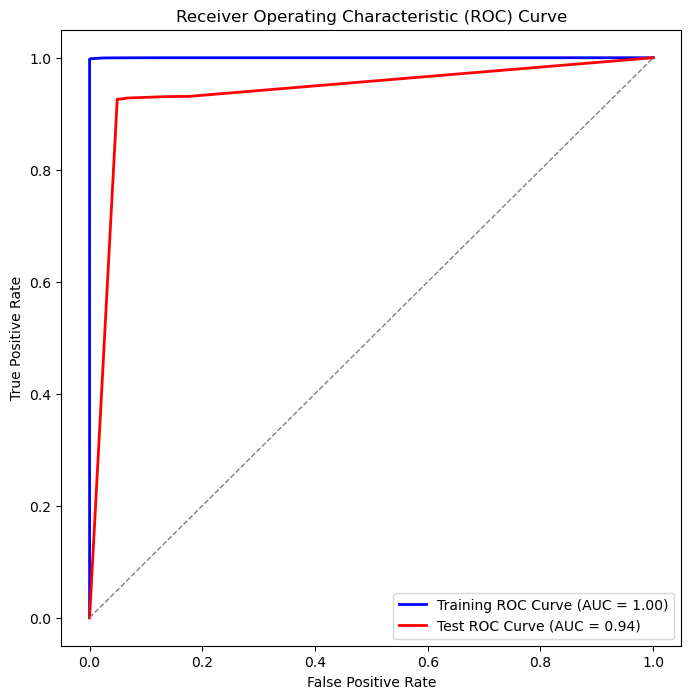

In [20]:
le = LabelEncoder()
y_train_binary = le.fit_transform(y_train)
y_test_binary = le.transform(y_test)

# Get the predicted probabilities for the positive class for both training and test sets
y_train_prob = tree.predict_proba(X_train)[:, 1]
y_test_prob = tree.predict_proba(X_test)[:, 1]

# Compute the ROC curve for both training and test sets
fpr_train, tpr_train, thresholds_train = roc_curve(y_train_binary, y_train_prob)
fpr_test, tpr_test, thresholds_test = roc_curve(y_test_binary, y_test_prob)

# Calculate the area under the curve (AUC) for both training and test sets
auc_train = auc(fpr_train, tpr_train)
auc_test = auc(fpr_test, tpr_test)

# Plot ROC curves
plt.figure(figsize=(8, 8))
plt.plot(fpr_train, tpr_train, color='blue', lw=2, label=f'Training ROC Curve (AUC = {auc_train:.2f})')
plt.plot(fpr_test, tpr_test, color='red', lw=2, label=f'Test ROC Curve (AUC = {auc_test:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

## Random Forest with Feature Engineering

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

X = df[['Temperature', 'Maximum Temperature', 'Maximum Max Temperature', 'Minimum Temperature', 'Minimum Min Temperature', 'Rainfall', 'Maximum Rainfall', 'Minimum Rainfall', 'Humidity', 'Maximum Humidity', 'Minimum Humidity',  'Ground Frost', 'Maximum Ground Frost', 'Minimum Ground Frost', 'Sunshine', 'Maximum Sunshine', 'Minimum Sunshine',  'Mean Sea Level Pressure', 'Maximum Mean Sea Level Pressure', 'Minimum Mean Sea Level Pressure', 'Wind Speed', 'Maximum Wind Speed', 'Minimum Wind Speed']].values
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_classifier = RandomForestClassifier(random_state=0, n_estimators=150, max_features='sqrt')
rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)

print('Accuracy on training set: {:3f}'.format(rf_classifier.score(X_train, y_train)))
print('Accuracy on test set: {:3f}'.format(rf_classifier.score(X_test, y_test)))
scores = cross_val_score(rf_classifier, X, y, cv=5)  # 5-fold cross-validation
print("Average Accuracy: {:.4f}".format(scores.mean()))
mean_score = scores.mean()
confidence = 0.95
confidence_interval = t.interval(confidence, len(scores) - 1, loc=mean_score, scale=sem(scores))
print(f"{int(confidence * 100)}% Confidence Interval:", confidence_interval)

Accuracy on training set: 1.000000
Accuracy on test set: 0.983146
Average Accuracy: 0.6371
95% Confidence Interval: (0.5355737841834283, 0.7386738073140557)


Temperature: 0.0242
Maximum Temperature: 0.0263
Maximum Max Temperature: 0.0408
Minimum Temperature: 0.0251
Minimum Min Temperature: 0.0609
Rainfall: 0.0304
Maximum Rainfall: 0.0232
Minimum Rainfall: 0.0538
Humidity: 0.1340
Maximum Humidity: 0.0370
Minimum Humidity: 0.0381
Ground Frost: 0.0412
Maximum Ground Frost: 0.0488
Minimum Ground Frost: 0.0288
Sunshine: 0.0287
Maximum Sunshine: 0.0451
Minimum Sunshine: 0.0282
Mean Sea Level Pressure: 0.0668
Maximum Mean Sea Level Pressure: 0.0756
Minimum Mean Sea Level Pressure: 0.0894
Wind Speed: 0.0172
Maximum Wind Speed: 0.0219
Minimum Wind Speed: 0.0145


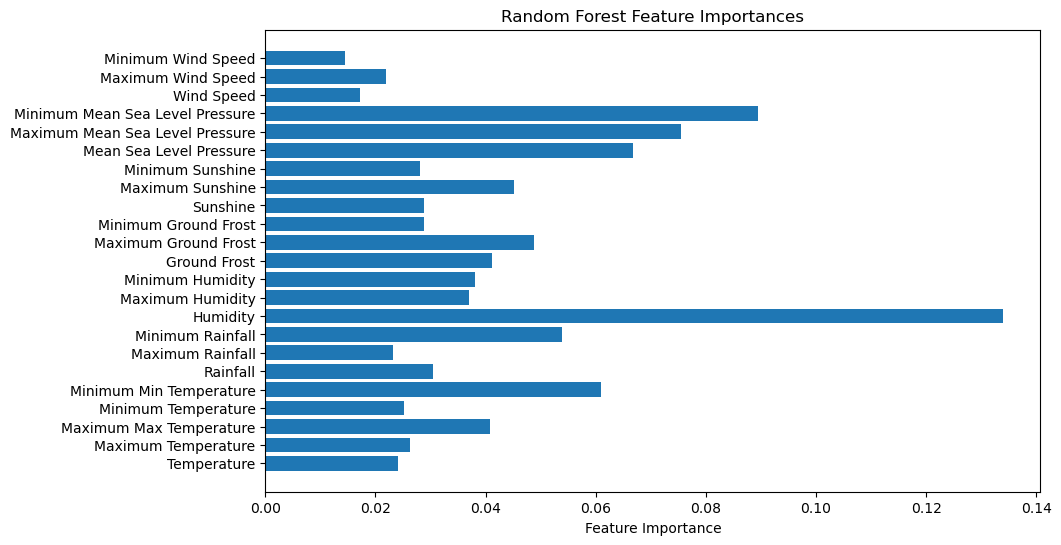

In [22]:
importances = rf_classifier.feature_importances_
feature_names = df[['Temperature', 'Maximum Temperature', 'Maximum Max Temperature', 'Minimum Temperature', 'Minimum Min Temperature', 'Rainfall', 'Maximum Rainfall', 'Minimum Rainfall', 'Humidity', 'Maximum Humidity', 'Minimum Humidity',  'Ground Frost', 'Maximum Ground Frost', 'Minimum Ground Frost', 'Sunshine', 'Maximum Sunshine', 'Minimum Sunshine',  'Mean Sea Level Pressure', 'Maximum Mean Sea Level Pressure', 'Minimum Mean Sea Level Pressure', 'Wind Speed', 'Maximum Wind Speed', 'Minimum Wind Speed']].columns

for feature, importance in zip(feature_names, importances):
    print('{}: {:.4f}'.format(feature, importance))

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.barh(range(len(importances)), importances, align='center')
plt.yticks(np.arange(len(importances)), feature_names)
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importances')
plt.show()

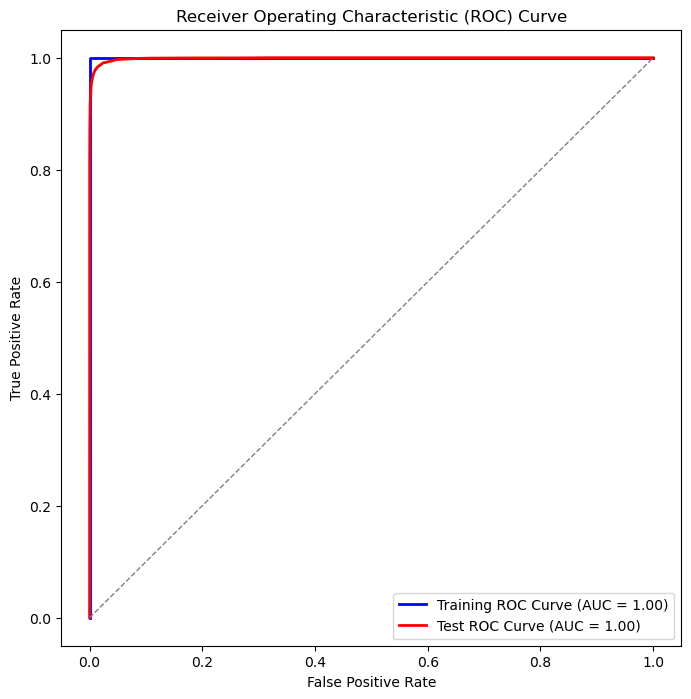

In [23]:
le = LabelEncoder()
y_train_binary = le.fit_transform(y_train)
y_test_binary = le.transform(y_test)

# Get the predicted probabilities for the positive class for both training and test sets
y_train_prob = rf_classifier.predict_proba(X_train)[:, 1]
y_test_prob = rf_classifier.predict_proba(X_test)[:, 1]

# Compute the ROC curve for both training and test sets
fpr_train, tpr_train, thresholds_train = roc_curve(y_train_binary, y_train_prob)
fpr_test, tpr_test, thresholds_test = roc_curve(y_test_binary, y_test_prob)

# Calculate the area under the curve (AUC) for both training and test sets
auc_train = auc(fpr_train, tpr_train)
auc_test = auc(fpr_test, tpr_test)

# Plot ROC curves
plt.figure(figsize=(8, 8))
plt.plot(fpr_train, tpr_train, color='blue', lw=2, label=f'Training ROC Curve (AUC = {auc_train:.2f})')
plt.plot(fpr_test, tpr_test, color='red', lw=2, label=f'Test ROC Curve (AUC = {auc_test:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

The mean values of the classes are 0.8547082921316571 0.09155205939543927
The standard deviations of the classes are 0.14139047381653488 0.09457745680915253


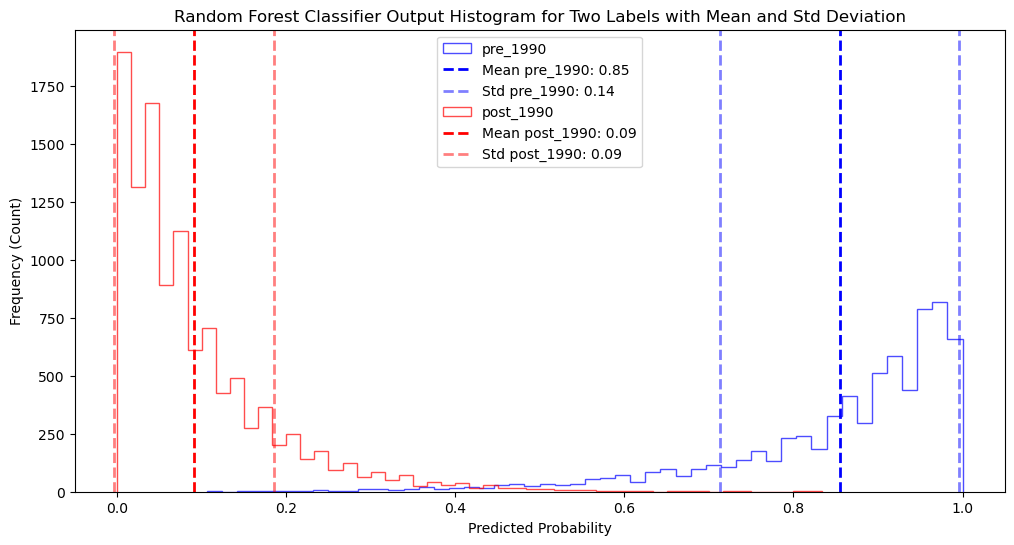

In [24]:
# Get the predicted probabilities for the positive class for the test set
y_test_prob = rf_classifier.predict_proba(X_test)[:, 1]

# Create a DataFrame with true labels and predicted probabilities
result_df = pd.DataFrame({
    'True_Label': y_test,
    'Predicted_Probability': y_test_prob
})

label_1 = 'pre_1990'
label_2 = 'post_1990'

# Filter the DataFrame for each label
data_label_1 = result_df[result_df['True_Label'] == label_1]['Predicted_Probability']
data_label_2 = result_df[result_df['True_Label'] == label_2]['Predicted_Probability']

# Calculate mean and standard deviation values
mean_label_1 = np.mean(data_label_1)
std_label_1 = np.std(data_label_1)

mean_label_2 = np.mean(data_label_2)
std_label_2 = np.std(data_label_2)

print('The mean values of the classes are', mean_label_1, mean_label_2)
print('The standard deviations of the classes are', std_label_1, std_label_2)

# Create histograms for each label using matplotlib without density normalization
plt.figure(figsize=(12, 6))

# Histogram for label_1
plt.hist(data_label_1, bins=50, alpha=0.7, label=f'{label_1}', color='blue', histtype='step')
plt.axvline(mean_label_1, color='blue', linestyle='dashed', linewidth=2, label=f'Mean {label_1}: {mean_label_1:.2f}')
plt.axvline(mean_label_1 + std_label_1, color='blue', linestyle='dashed', linewidth=2, label=f'Std {label_1}: {std_label_1:.2f}', alpha=0.5)
plt.axvline(mean_label_1 - std_label_1, color='blue', linestyle='dashed', linewidth=2, alpha=0.5)

# Histogram for label_2
plt.hist(data_label_2, bins=50, alpha=0.7, label=f'{label_2}', color='red', histtype='step')
plt.axvline(mean_label_2, color='red', linestyle='dashed', linewidth=2, label=f'Mean {label_2}: {mean_label_2:.2f}')
plt.axvline(mean_label_2 + std_label_2, color='red', linestyle='dashed', linewidth=2, label=f'Std {label_2}: {std_label_2:.2f}', alpha=0.5)
plt.axvline(mean_label_2 - std_label_2, color='red', linestyle='dashed', linewidth=2, alpha=0.5)

plt.title('Random Forest Classifier Output Histogram for Two Labels with Mean and Std Deviation')
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency (Count)')
plt.legend()
plt.show()

In [25]:
z = (mean_label_1 - mean_label_2) / np.sqrt((std_label_1 **2) + (std_label_2 **2))

print('The Z-score for the nominal Random Forest classifier with feature engineering is', z)

The Z-score for the nominal Random Forest classifier with feature engineering is 4.486348392863123


## Ada Boost Tree with Feature Engineering

In [27]:
from sklearn.ensemble import AdaBoostClassifier

X = df[['Temperature', 'Maximum Temperature', 'Maximum Max Temperature', 'Minimum Temperature', 'Minimum Min Temperature', 'Rainfall', 'Maximum Rainfall', 'Minimum Rainfall', 'Humidity', 'Maximum Humidity', 'Minimum Humidity',  'Ground Frost', 'Maximum Ground Frost', 'Minimum Ground Frost', 'Sunshine', 'Maximum Sunshine', 'Minimum Sunshine',  'Mean Sea Level Pressure', 'Maximum Mean Sea Level Pressure', 'Minimum Mean Sea Level Pressure', 'Wind Speed', 'Maximum Wind Speed', 'Minimum Wind Speed']].values
y = df['Class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate a weak classifier (Decision Tree in this case)
base_classifier = DecisionTreeClassifier(max_depth=7, random_state=0)

# Instantiate the AdaBoost classifier
adaboost_classifier = AdaBoostClassifier(base_classifier, n_estimators=150, learning_rate=0.1, random_state=0)

# Train the AdaBoost classifier
adaboost_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = adaboost_classifier.predict(X_test)

print('Accuracy on training set: {:3f}'.format(adaboost_classifier.score(X_train, y_train)))
print('Accuracy on test set: {:3f}'.format(adaboost_classifier.score(X_test, y_test)))

Accuracy on training set: 0.999959
Accuracy on test set: 0.991301


Temperature: 0.0209
Maximum Temperature: 0.0307
Maximum Max Temperature: 0.0490
Minimum Temperature: 0.0195
Minimum Min Temperature: 0.0621
Rainfall: 0.0187
Maximum Rainfall: 0.0162
Minimum Rainfall: 0.0502
Humidity: 0.0572
Maximum Humidity: 0.0179
Minimum Humidity: 0.0163
Ground Frost: 0.0332
Maximum Ground Frost: 0.0449
Minimum Ground Frost: 0.0160
Sunshine: 0.0330
Maximum Sunshine: 0.0548
Minimum Sunshine: 0.0293
Mean Sea Level Pressure: 0.1123
Maximum Mean Sea Level Pressure: 0.1208
Minimum Mean Sea Level Pressure: 0.1396
Wind Speed: 0.0167
Maximum Wind Speed: 0.0283
Minimum Wind Speed: 0.0123


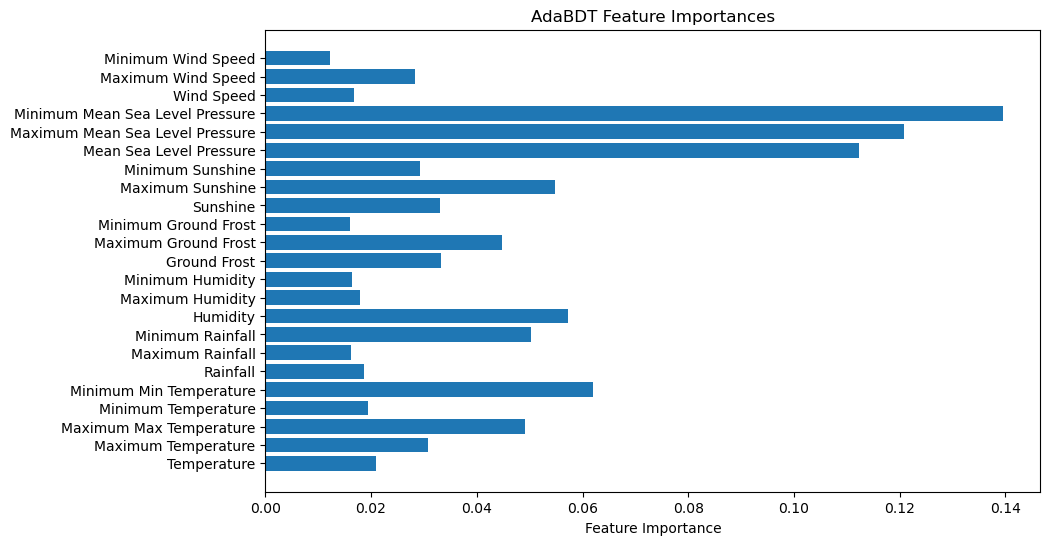

In [28]:
importances = adaboost_classifier.feature_importances_
feature_names = df[['Temperature', 'Maximum Temperature', 'Maximum Max Temperature', 'Minimum Temperature', 'Minimum Min Temperature', 'Rainfall', 'Maximum Rainfall', 'Minimum Rainfall', 'Humidity', 'Maximum Humidity', 'Minimum Humidity',  'Ground Frost', 'Maximum Ground Frost', 'Minimum Ground Frost', 'Sunshine', 'Maximum Sunshine', 'Minimum Sunshine',  'Mean Sea Level Pressure', 'Maximum Mean Sea Level Pressure', 'Minimum Mean Sea Level Pressure', 'Wind Speed', 'Maximum Wind Speed', 'Minimum Wind Speed']].columns

for feature, importance in zip(feature_names, importances):
    print('{}: {:.4f}'.format(feature, importance))

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.barh(range(len(importances)), importances, align='center')
plt.yticks(np.arange(len(importances)), feature_names)
plt.xlabel('Feature Importance')
plt.title('AdaBDT Feature Importances')
plt.show()

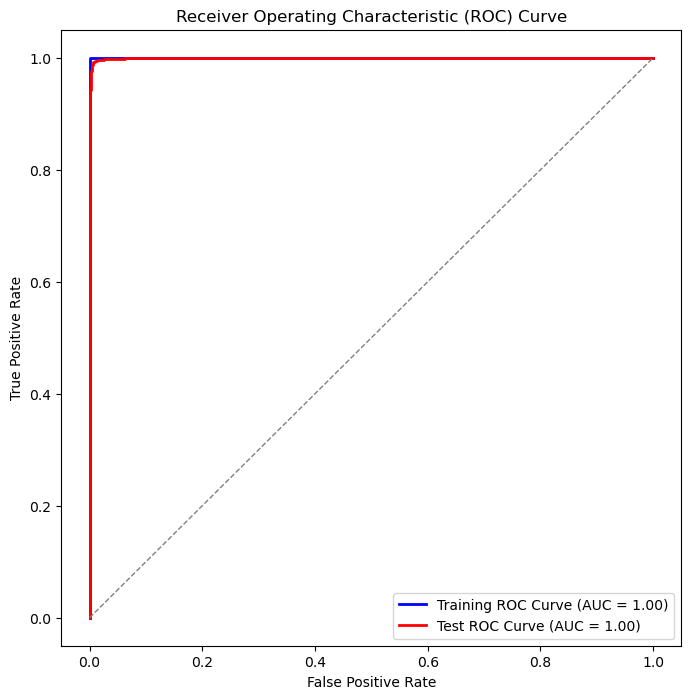

In [29]:
le = LabelEncoder()
y_train_binary = le.fit_transform(y_train)
y_test_binary = le.transform(y_test)

# Get the predicted probabilities for the positive class for both training and test sets
y_train_prob = adaboost_classifier.predict_proba(X_train)[:, 1]
y_test_prob = adaboost_classifier.predict_proba(X_test)[:, 1]

# Compute the ROC curve for both training and test sets
fpr_train, tpr_train, thresholds_train = roc_curve(y_train_binary, y_train_prob)
fpr_test, tpr_test, thresholds_test = roc_curve(y_test_binary, y_test_prob)

# Calculate the area under the curve (AUC) for both training and test sets
auc_train = auc(fpr_train, tpr_train)
auc_test = auc(fpr_test, tpr_test)

# Plot ROC curves
plt.figure(figsize=(8, 8))
plt.plot(fpr_train, tpr_train, color='blue', lw=2, label=f'Training ROC Curve (AUC = {auc_train:.2f})')
plt.plot(fpr_test, tpr_test, color='red', lw=2, label=f'Test ROC Curve (AUC = {auc_test:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

The mean values of the classes are 0.7296856352454187 0.2581866558366458
The standard deviations of the classes are 0.13010807771818989 0.11547898403495034


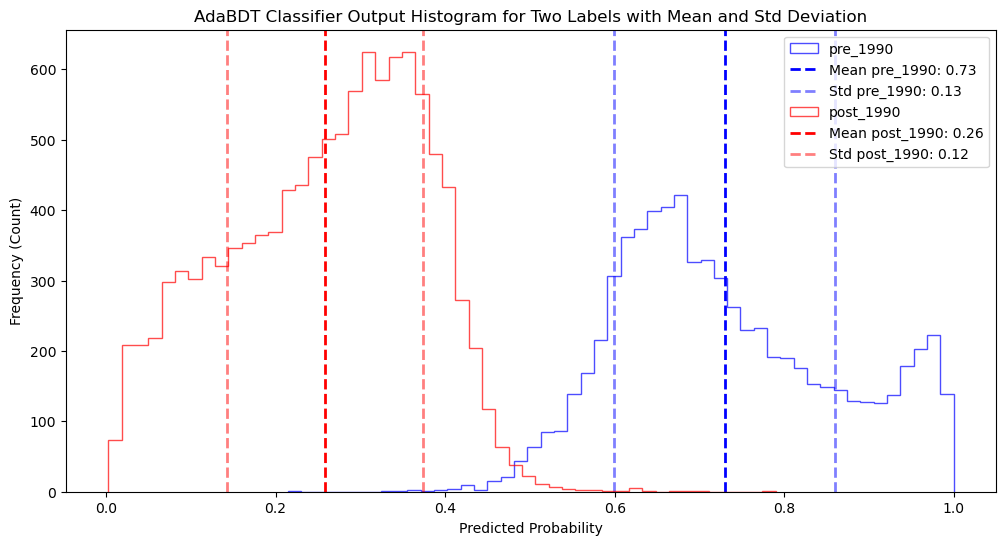

In [30]:
# Get the predicted probabilities for the positive class for the test set
y_test_prob = adaboost_classifier.predict_proba(X_test)[:, 1]

# Create a DataFrame with true labels and predicted probabilities
result_df = pd.DataFrame({
    'True_Label': y_test,
    'Predicted_Probability': y_test_prob
})

label_1 = 'pre_1990'
label_2 = 'post_1990'

# Filter the DataFrame for each label
data_label_1 = result_df[result_df['True_Label'] == label_1]['Predicted_Probability']
data_label_2 = result_df[result_df['True_Label'] == label_2]['Predicted_Probability']

# Calculate mean and standard deviation values
mean_label_1 = np.mean(data_label_1)
std_label_1 = np.std(data_label_1)

mean_label_2 = np.mean(data_label_2)
std_label_2 = np.std(data_label_2)

print('The mean values of the classes are', mean_label_1, mean_label_2)
print('The standard deviations of the classes are', std_label_1, std_label_2)

# Create histograms for each label using matplotlib without density normalization
plt.figure(figsize=(12, 6))

# Histogram for label_1
plt.hist(data_label_1, bins=50, alpha=0.7, label=f'{label_1}', color='blue', histtype='step')
plt.axvline(mean_label_1, color='blue', linestyle='dashed', linewidth=2, label=f'Mean {label_1}: {mean_label_1:.2f}')
plt.axvline(mean_label_1 + std_label_1, color='blue', linestyle='dashed', linewidth=2, label=f'Std {label_1}: {std_label_1:.2f}', alpha=0.5)
plt.axvline(mean_label_1 - std_label_1, color='blue', linestyle='dashed', linewidth=2, alpha=0.5)

# Histogram for label_2
plt.hist(data_label_2, bins=50, alpha=0.7, label=f'{label_2}', color='red', histtype='step')
plt.axvline(mean_label_2, color='red', linestyle='dashed', linewidth=2, label=f'Mean {label_2}: {mean_label_2:.2f}')
plt.axvline(mean_label_2 + std_label_2, color='red', linestyle='dashed', linewidth=2, label=f'Std {label_2}: {std_label_2:.2f}', alpha=0.5)
plt.axvline(mean_label_2 - std_label_2, color='red', linestyle='dashed', linewidth=2, alpha=0.5)

plt.title('AdaBDT Classifier Output Histogram for Two Labels with Mean and Std Deviation')
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency (Count)')
plt.legend()
plt.show()

In [31]:
z = (mean_label_1 - mean_label_2) / np.sqrt((std_label_1 **2) + (std_label_2 **2))

print('The Z-score for the nominal AdaBDT classifier with feature engineering is', z)

The Z-score for the nominal AdaBDT classifier with feature engineering is 2.7103234684345
